## Project 

### Import Lib

In [1]:
import numpy as np
np.set_printoptions(threshold=10000,suppress=True)
#permet d'afficher toutes les lignes
#suppress -> chiffres en notation normal et pas en format scientifique
import pandas as pd
import warnings
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.ensemble import RandomForestClassifier
from collections import Counter

### Import data 

In [3]:
na_values = ['na']

In [4]:
data = pd.read_csv('./tm_ok.csv', sep=',',na_values=na_values)

In [5]:
# Filtrage en gardant seulement championnat
data = data.loc[data["League Name"]!='Champions-League']
data = data.loc[data["League Name"]!='Europa-League']
data

Unnamed: 0              Player   Nation    Pos         Squad  Age  \
0              0          Aaron Hunt   de GER  MF,FW  Hamburger SV   30   
1              1        Abdou Diallo   sn SEN     DF      Mainz 05   21   
2              2     Ademola Lookman  eng ENG  MF,FW    RB Leipzig   19   
3              3       Admir Mehmedi   ch SUI  DF,MF    Leverkusen   26   
4              4       Admir Mehmedi   ch SUI  FW,MF     Wolfsburg   26   
...          ...                 ...      ...    ...           ...  ...   
8675       18750  Zlatan Ibrahimović   se SWE     FW         Milan   38   
8676       18751      Álex Berenguer   es ESP     MF        Torino   25   
8677       18752       Álvaro Morata   es ESP     FW      Juventus   27   
8678       18754    Łukasz Skorupski   pl POL     GK       Bologna   29   
8679       18755         Ștefan Radu   ro ROU     DF         Lazio   33   

        Born  MP  Starts     Min  ...  Lost  Won%  League Name  League ID  \
0     1986.0  28      26  2081.0  ...  37.0  37.3   Bundesliga         20   
1     1996.0  27      27  2415.0  ...  28.0  72.5   Bundesliga         20   
2     1997.0  11       7   574.0  ...   6.0  33.3   Bundesliga         20   
3     1991.0  12       8   700.0  ...   5.0  66.7   Bundesliga         20   
4     1991.0   5       3   290.0  ...   8.0  50.0   Bundesliga         20   
...      ...  ..     ...     ...  ...   ...   ...          ...        ...   
8675  1981.0  19      18  1493.0  ...  45.0  62.2      Serie-A         11   
8676  1995.0   2       2   131.0  ...   2.0  33.3      Serie-A         11   
8677  1992.0  32      23  2014.0  ...  32.0  50.0      Serie-A         11   
8678  1991.0  28      28  2520.0  ...   0.0   NaN      Serie-A         11   
8679  1986.0  31      30  2458.0  ...  28.0  62.7      Serie-A         11   

         Season        Player_lower  player_id                       position  \
0     2017-2018          aaron hunt     4687.0  midfield - Attacking Midfield   
1     2017-2018        abdou diallo   229005.0         Defender - Centre-Back   
2     2017-2018     ademola lookman   406040.0           attack - Left Winger   
3     2017-2018       admir mehmedi    66058.0        attack - Second Striker   
4     2017-2018       admir mehmedi    66058.0        attack - Second Striker   
...         ...                 ...        ...                            ...   
8675  2020-2021  zlatan ibrahimovic     3455.0        attack - Centre-Forward   
8676  2020-2021      alex berenguer   338425.0           attack - Left Winger   
8677  2020-2021       alvaro morata   128223.0        attack - Centre-Forward   
8678  2020-2021    lukasz skorupski    80894.0                     Goalkeeper   
8679  2020-2021         stefan radu    44420.0         Defender - Centre-Back   

                     club  market_value  
0            Hamburger SV  1.500000e+06  
1          1.FSV Mainz 05  8.625000e+06  
2              RB Leipzig  1.200000e+07  
3     Bayer 04 Leverkusen  3.500000e+06  
4           VfL Wolfsburg  5.000000e+06  
...                   ...           ...  
8675             AC Milan  4.166667e+06  
8676            Torino FC  6.000000e+06  
8677          Juventus FC  4.500000e+07  
8678      Bologna FC 1909  4.433333e+06  
8679             SS Lazio  2.833333e+06  

[8680 rows x 169 columns]

In [6]:
data['position'].unique()

array(['midfield - Attacking Midfield', 'Defender - Centre-Back',
       'attack - Left Winger', 'attack - Second Striker',
       'midfield - Defensive Midfield', 'attack - Right Winger',
       'attack - Centre-Forward', 'Goalkeeper', 'Defender - Right-Back',
       'midfield - Central Midfield', 'Defender - Left-Back',
       'midfield - Left Midfield', 'midfield - Right Midfield',
       'midfield'], dtype=object)

In [7]:
data = data.loc[(data["position"]=='attack - Left Winger') | \
                          (data["position"]=='attack - Second Striker') | (data["position"]=='attack - Right Winger') \
                         | (data["position"]=='attack - Centre-Forward')]
data

Unnamed: 0              Player   Nation    Pos       Squad  Age    Born  \
2              2     Ademola Lookman  eng ENG  MF,FW  RB Leipzig   19  1997.0   
3              3       Admir Mehmedi   ch SUI  DF,MF  Leverkusen   26  1991.0   
4              4       Admir Mehmedi   ch SUI  FW,MF   Wolfsburg   26  1991.0   
7              9   Alexander Esswein   de GER  FW,MF  Hertha BSC   27  1990.0   
9             11      Alexander Isak   se SWE  FW,MF    Dortmund   17  1999.0   
...          ...                 ...      ...    ...         ...  ...     ...   
8667       18735    Vincenzo Millico   it ITA  FW,MF      Torino   19  2000.0   
8668       18736   Vittorio Parigini   it ITA  FW,DF       Genoa   24  1996.0   
8675       18750  Zlatan Ibrahimović   se SWE     FW       Milan   38  1981.0   
8676       18751      Álex Berenguer   es ESP     MF      Torino   25  1995.0   
8677       18752       Álvaro Morata   es ESP     FW    Juventus   27  1992.0   

      MP  Starts     Min  ...  Lost  Won%  League Name  League ID     Season  \
2     11       7   574.0  ...   6.0  33.3   Bundesliga         20  2017-2018   
3     12       8   700.0  ...   5.0  66.7   Bundesliga         20  2017-2018   
4      5       3   290.0  ...   8.0  50.0   Bundesliga         20  2017-2018   
7     16       6   617.0  ...   8.0  42.9   Bundesliga         20  2017-2018   
9      5       1   119.0  ...   4.0  50.0   Bundesliga         20  2017-2018   
...   ..     ...     ...  ...   ...   ...          ...        ...        ...   
8667   3       0    21.0  ...   0.0   NaN      Serie-A         11  2020-2021   
8668   4       0    56.0  ...   2.0  33.3      Serie-A         11  2020-2021   
8675  19      18  1493.0  ...  45.0  62.2      Serie-A         11  2020-2021   
8676   2       2   131.0  ...   2.0  33.3      Serie-A         11  2020-2021   
8677  32      23  2014.0  ...  32.0  50.0      Serie-A         11  2020-2021   

            Player_lower  player_id                 position  \
2        ademola lookman   406040.0     attack - Left Winger   
3          admir mehmedi    66058.0  attack - Second Striker   
4          admir mehmedi    66058.0  attack - Second Striker   
7      alexander esswein    45662.0    attack - Right Winger   
9         alexander isak   349066.0  attack - Centre-Forward   
...                  ...        ...                      ...   
8667    vincenzo millico   390159.0     attack - Left Winger   
8668   vittorio parigini   238981.0    attack - Right Winger   
8675  zlatan ibrahimovic     3455.0  attack - Centre-Forward   
8676      alex berenguer   338425.0     attack - Left Winger   
8677       alvaro morata   128223.0  attack - Centre-Forward   

                     club  market_value  
2              RB Leipzig  1.200000e+07  
3     Bayer 04 Leverkusen  3.500000e+06  
4           VfL Wolfsburg  5.000000e+06  
7              Hertha BSC  2.250000e+06  
9       Borussia Dortmund  6.000000e+06  
...                   ...           ...  
8667            Torino FC  1.650000e+06  
8668            Genoa CFC  1.000000e+06  
8675             AC Milan  4.166667e+06  
8676            Torino FC  6.000000e+06  
8677          Juventus FC  4.500000e+07  

[2442 rows x 169 columns]

### Data preprocessing 

In [8]:
data['Nation'] = data['Nation'].astype('string')
data = data.dropna(subset=['Nation'])
data["Nation_new"] = data['Nation'].apply(lambda x: x[3:7])
data = data.drop(columns=['Nation'])

In [9]:
# Colonnes utiles
mycolumns = ['Player_id','Age','90s','CrdY','CrdR','Gls/90','Ast/90','xG/90','xA/90','Sh/90','SoT/90','Dist','FK','Cmp','Att',\
             'TotDist','PrgDist','Cmp_short','Att_short','Cmp_medium','Att_medium','Cmp_long','Att_long','KP','1/3','PPA',\
             'CrsPA','Prog','SCA90','PassLive','PassDead','Drib','Fld','Def','GCA90','PassLive_AMB','PassDead_AMB','Drib_AMB',\
            'Fld_AMB','Def_AMB','Tkl','TklW','Def 3rd','Mid 3rd','Att 3rd','Tkl_dribble','Past','Succ','Def 3rd_pression', \
             'Mid 3rd_pression','Att 3rd_pression','Touches','Def Pen','Att Pen','Carries','CPA','Fls']

In [10]:
data['Pos']

2       MF,FW
3       DF,MF
4       FW,MF
7       FW,MF
9       FW,MF
        ...  
8667    FW,MF
8668    FW,DF
8675       FW
8676       MF
8677       FW
Name: Pos, Length: 2442, dtype: object

In [11]:
# recodage des modalités
data['Pos'] = data['Pos'].str.split(',')
data['Season'] = data['Season'].str.split('-')

In [12]:
data['Pos']

2       [MF, FW]
3       [DF, MF]
4       [FW, MF]
7       [FW, MF]
9       [FW, MF]
          ...   
8667    [FW, MF]
8668    [FW, DF]
8675        [FW]
8676        [MF]
8677        [FW]
Name: Pos, Length: 2442, dtype: object

In [13]:
data['Pos'] = [elem[0] for elem in data['Pos']]
data['Season'] = [elem[1] for elem in data['Season']]

In [14]:
data['Pos']

2       MF
3       DF
4       FW
7       FW
9       FW
        ..
8667    FW
8668    FW
8675    FW
8676    MF
8677    FW
Name: Pos, Length: 2442, dtype: object

In [15]:
display(data['Pos'],
        data['Season'])

2       MF
3       DF
4       FW
7       FW
9       FW
        ..
8667    FW
8668    FW
8675    FW
8676    MF
8677    FW
Name: Pos, Length: 2442, dtype: object

2       2018
3       2018
4       2018
7       2018
9       2018
        ... 
8667    2021
8668    2021
8675    2021
8676    2021
8677    2021
Name: Season, Length: 2442, dtype: object

In [16]:
data['Player_id']=data['Player']+data['Season']

In [17]:
data['Player_id']

2          Ademola Lookman2018
3            Admir Mehmedi2018
4            Admir Mehmedi2018
7        Alexander Esswein2018
9           Alexander Isak2018
                 ...          
8667      Vincenzo Millico2021
8668     Vittorio Parigini2021
8675    Zlatan Ibrahimović2021
8676        Álex Berenguer2021
8677         Álvaro Morata2021
Name: Player_id, Length: 2442, dtype: object

In [18]:
#

In [19]:
data_ok=data[mycolumns]
data_ok

Player_id  Age   90s  CrdY  CrdR  Gls/90  Ast/90  xG/90  \
2        Ademola Lookman2018   19   6.4     1     0    0.78    0.47   0.36   
3          Admir Mehmedi2018   26   7.8     3     0    0.26    0.39   0.14   
4          Admir Mehmedi2018   26   3.2     0     0    0.31    0.00   0.04   
7      Alexander Esswein2018   27   6.9     0     0    0.29    0.15   0.12   
9         Alexander Isak2018   17   1.3     0     0    0.00    0.00   0.48   
...                      ...  ...   ...   ...   ...     ...     ...    ...   
8667    Vincenzo Millico2021   19   0.2     0     0    0.00    0.00   0.00   
8668   Vittorio Parigini2021   24   0.6     0     0    0.00    0.00   0.01   
8675  Zlatan Ibrahimović2021   38  16.6     2     1    0.90    0.12   0.98   
8676      Álex Berenguer2021   25   1.5     0     0    0.00    0.00   0.22   
8677       Álvaro Morata2021   27  22.4     3     1    0.49    0.40   0.49   

      xA/90  Sh/90  ...  Succ  Def 3rd_pression  Mid 3rd_pression  \
2      0.54   2.04  ...  30.0              17.0              48.0   
3      0.17   1.67  ...  29.0              32.0              69.0   
4      0.04   1.24  ...  18.0              19.0              24.0   
7      0.03   1.46  ...  50.0              64.0             104.0   
9      0.16   3.78  ...   7.0               0.0               6.0   
...     ...    ...  ...   ...               ...               ...   
8667   0.09   0.00  ...   1.0               3.0               4.0   
8668   0.00   1.61  ...   5.0               3.0               6.0   
8675   0.09   4.58  ...  36.0               4.0              54.0   
8676   0.00   1.37  ...   4.0               7.0              25.0   
8677   0.22   2.41  ...  88.0              30.0             142.0   

      Att 3rd_pression  Touches  Def Pen  Att Pen  Carries   CPA  Fls  
2                 24.0    312.0      6.0     30.0    270.0   7.0   13  
3                 24.0    519.0     10.0     27.0    340.0   5.0   21  
4                 11.0    158.0      4.0      4.0    102.0   1.0    5  
7                 53.0    307.0     10.0     15.0    198.0   4.0   16  
9                  9.0     43.0      0.0      9.0     26.0   0.0    2  
...                ...      ...      ...      ...      ...   ...  ...  
8667               0.0     11.0      0.0      0.0      8.0   0.0    0  
8668               6.0     35.0      1.0      0.0     23.0   0.0    0  
8675              62.0    759.0     32.0    148.0    432.0   9.0   36  
8676               6.0     66.0      4.0      1.0     45.0   0.0    2  
8677             160.0    894.0     24.0    148.0    580.0  18.0   41  

[2442 rows x 57 columns]

In [20]:
#Données non normalisées
liste_90 = ['CrdY','CrdR','Dist','FK','Cmp','Att',\
             'TotDist','PrgDist','Cmp_short','Att_short','Cmp_medium','Att_medium','Cmp_long','Att_long','KP','1/3','PPA',\
             'CrsPA','Prog','PassLive','PassDead','Drib','Fld','Def','PassLive_AMB','PassDead_AMB','Drib_AMB',\
            'Fld_AMB','Def_AMB','Tkl','TklW','Def 3rd','Mid 3rd','Att 3rd','Tkl_dribble','Past','Succ','Def 3rd_pression', \
             'Mid 3rd_pression','Att 3rd_pression','Touches','Def Pen','Att Pen','Carries','CPA','Fls']

In [21]:
# Filtres sur les joueurs ayant + de 6 matchs 
data_ok_flt = data_ok.loc[data_ok['90s'] > 6]  

In [22]:
# Boucle pour normaliser les données (qui ne l'étaient pas)
for i in liste_90:
    data_ok_flt[str(i)]=data_ok_flt[str(i)]/data_ok_flt['90s']
del data_ok_flt['90s']
data_ok_flt

Player_id  Age      CrdY      CrdR  Gls/90  Ast/90  xG/90  \
2         Ademola Lookman2018   19  0.156250  0.000000    0.78    0.47   0.36   
3           Admir Mehmedi2018   26  0.384615  0.000000    0.26    0.39   0.14   
7       Alexander Esswein2018   27  0.000000  0.000000    0.29    0.15   0.12   
16       Anastasios Donis2018   20  0.095238  0.000000    0.19    0.19   0.43   
19      Andriy Yarmolenko2018   27  0.000000  0.000000    0.26    0.26   0.46   
...                       ...  ...       ...       ...     ...     ...    ...   
8648  Stephan El Shaarawy2021   27  0.156250  0.000000    0.16    0.16   0.21   
8664         Vedat Muriqi2021   26  0.108696  0.000000    0.11    0.00   0.50   
8665       Victor Osimhen2021   21  0.228571  0.000000    0.57    0.17   0.59   
8675   Zlatan Ibrahimović2021   38  0.120482  0.060241    0.90    0.12   0.98   
8677        Álvaro Morata2021   27  0.133929  0.044643    0.49    0.40   0.49   

      xA/90  Sh/90  SoT/90  ...      Succ  Def 3rd_pression  Mid 3rd_pression  \
2      0.54   2.04    0.94  ...  4.687500          2.656250          7.500000   
3      0.17   1.67    0.51  ...  3.717949          4.102564          8.846154   
7      0.03   1.46    0.88  ...  7.246377          9.275362         15.072464   
16     0.19   3.60    1.23  ...  4.666667          3.904762         10.095238   
19     0.35   2.60    0.95  ...  4.000000          2.608696          6.695652   
...     ...    ...     ...  ...       ...               ...               ...   
8648   0.24   2.52    1.10  ...  2.031250          2.343750          6.093750   
8664   0.03   3.46    0.76  ...  4.021739          1.195652          6.956522   
8665   0.15   3.66    1.49  ...  4.514286          0.971429          6.342857   
8675   0.09   4.58    2.05  ...  2.168675          0.240964          3.253012   
8677   0.22   2.41    1.03  ...  3.928571          1.339286          6.339286   

      Att 3rd_pression    Touches   Def Pen   Att Pen    Carries       CPA  \
2             3.750000  48.750000  0.937500  4.687500  42.187500  1.093750   
3             3.076923  66.538462  1.282051  3.461538  43.589744  0.641026   
7             7.681159  44.492754  1.449275  2.173913  28.695652  0.579710   
16            5.714286  36.857143  0.666667  4.285714  29.809524  2.000000   
19            5.391304  51.565217  0.695652  6.173913  42.260870  1.913043   
...                ...        ...       ...       ...        ...       ...   
8648          5.000000  48.281250  0.625000  6.875000  37.812500  1.875000   
8664          7.391304  42.173913  2.065217  8.260870  24.456522  0.434783   
8665         10.685714  27.257143  0.571429  6.285714  17.085714  1.371429   
8675          3.734940  45.722892  1.927711  8.915663  26.024096  0.542169   
8677          7.142857  39.910714  1.071429  6.607143  25.892857  0.803571   

           Fls  
2     2.031250  
3     2.692308  
7     2.318841  
16    1.619048  
19    1.391304  
...        ...  
8648  1.250000  
8664  1.847826  
8665  2.171429  
8675  2.168675  
8677  1.830357  

[1743 rows x 56 columns]

### Traitement des NaN

In [23]:
data_ok_flt.isna().sum(axis = 0)

Player_id           0
Age                 0
CrdY                0
CrdR                0
Gls/90              0
Ast/90              0
xG/90               0
xA/90               0
Sh/90               0
SoT/90              0
Dist                0
FK                  0
Cmp                 0
Att                 0
TotDist             0
PrgDist             0
Cmp_short           0
Att_short           0
Cmp_medium          0
Att_medium          0
Cmp_long            0
Att_long            0
KP                  0
1/3                 0
PPA                 0
CrsPA               0
Prog                0
SCA90               0
PassLive            0
PassDead            0
Drib                0
Fld                 0
Def                 0
GCA90               0
PassLive_AMB        0
PassDead_AMB        0
Drib_AMB            0
Fld_AMB             0
Def_AMB             0
Tkl                 0
TklW                0
Def 3rd             0
Mid 3rd             0
Att 3rd             0
Tkl_dribble         0
Past      

In [24]:
data_ok_flt=data_ok_flt.drop(columns=['Dist'])

In [25]:
data_ok_flt.to_csv('data_ok_flt')

In [26]:
data_ok_flt

Player_id  Age      CrdY      CrdR  Gls/90  Ast/90  xG/90  \
2         Ademola Lookman2018   19  0.156250  0.000000    0.78    0.47   0.36   
3           Admir Mehmedi2018   26  0.384615  0.000000    0.26    0.39   0.14   
7       Alexander Esswein2018   27  0.000000  0.000000    0.29    0.15   0.12   
16       Anastasios Donis2018   20  0.095238  0.000000    0.19    0.19   0.43   
19      Andriy Yarmolenko2018   27  0.000000  0.000000    0.26    0.26   0.46   
...                       ...  ...       ...       ...     ...     ...    ...   
8648  Stephan El Shaarawy2021   27  0.156250  0.000000    0.16    0.16   0.21   
8664         Vedat Muriqi2021   26  0.108696  0.000000    0.11    0.00   0.50   
8665       Victor Osimhen2021   21  0.228571  0.000000    0.57    0.17   0.59   
8675   Zlatan Ibrahimović2021   38  0.120482  0.060241    0.90    0.12   0.98   
8677        Álvaro Morata2021   27  0.133929  0.044643    0.49    0.40   0.49   

      xA/90  Sh/90  SoT/90  ...      Succ  Def 3rd_pression  Mid 3rd_pression  \
2      0.54   2.04    0.94  ...  4.687500          2.656250          7.500000   
3      0.17   1.67    0.51  ...  3.717949          4.102564          8.846154   
7      0.03   1.46    0.88  ...  7.246377          9.275362         15.072464   
16     0.19   3.60    1.23  ...  4.666667          3.904762         10.095238   
19     0.35   2.60    0.95  ...  4.000000          2.608696          6.695652   
...     ...    ...     ...  ...       ...               ...               ...   
8648   0.24   2.52    1.10  ...  2.031250          2.343750          6.093750   
8664   0.03   3.46    0.76  ...  4.021739          1.195652          6.956522   
8665   0.15   3.66    1.49  ...  4.514286          0.971429          6.342857   
8675   0.09   4.58    2.05  ...  2.168675          0.240964          3.253012   
8677   0.22   2.41    1.03  ...  3.928571          1.339286          6.339286   

      Att 3rd_pression    Touches   Def Pen   Att Pen    Carries       CPA  \
2             3.750000  48.750000  0.937500  4.687500  42.187500  1.093750   
3             3.076923  66.538462  1.282051  3.461538  43.589744  0.641026   
7             7.681159  44.492754  1.449275  2.173913  28.695652  0.579710   
16            5.714286  36.857143  0.666667  4.285714  29.809524  2.000000   
19            5.391304  51.565217  0.695652  6.173913  42.260870  1.913043   
...                ...        ...       ...       ...        ...       ...   
8648          5.000000  48.281250  0.625000  6.875000  37.812500  1.875000   
8664          7.391304  42.173913  2.065217  8.260870  24.456522  0.434783   
8665         10.685714  27.257143  0.571429  6.285714  17.085714  1.371429   
8675          3.734940  45.722892  1.927711  8.915663  26.024096  0.542169   
8677          7.142857  39.910714  1.071429  6.607143  25.892857  0.803571   

           Fls  
2     2.031250  
3     2.692308  
7     2.318841  
16    1.619048  
19    1.391304  
...        ...  
8648  1.250000  
8664  1.847826  
8665  2.171429  
8675  2.168675  
8677  1.830357  

[1743 rows x 55 columns]

In [27]:
#Séparation des variables 
X = data_ok_flt.drop(['Player_id'], axis=1)

In [28]:
# Categorical variable
X_cat = data_ok_flt[['Player_id']]

In [29]:
X_cat

Player_id
2         Ademola Lookman2018
3           Admir Mehmedi2018
7       Alexander Esswein2018
16       Anastasios Donis2018
19      Andriy Yarmolenko2018
...                       ...
8648  Stephan El Shaarawy2021
8664         Vedat Muriqi2021
8665       Victor Osimhen2021
8675   Zlatan Ibrahimović2021
8677        Álvaro Morata2021

[1743 rows x 1 columns]

In [30]:
X.columns

Index(['Age', 'CrdY', 'CrdR', 'Gls/90', 'Ast/90', 'xG/90', 'xA/90', 'Sh/90',
       'SoT/90', 'FK', 'Cmp', 'Att', 'TotDist', 'PrgDist', 'Cmp_short',
       'Att_short', 'Cmp_medium', 'Att_medium', 'Cmp_long', 'Att_long', 'KP',
       '1/3', 'PPA', 'CrsPA', 'Prog', 'SCA90', 'PassLive', 'PassDead', 'Drib',
       'Fld', 'Def', 'GCA90', 'PassLive_AMB', 'PassDead_AMB', 'Drib_AMB',
       'Fld_AMB', 'Def_AMB', 'Tkl', 'TklW', 'Def 3rd', 'Mid 3rd', 'Att 3rd',
       'Tkl_dribble', 'Past', 'Succ', 'Def 3rd_pression', 'Mid 3rd_pression',
       'Att 3rd_pression', 'Touches', 'Def Pen', 'Att Pen', 'Carries', 'CPA',
       'Fls'],
      dtype='object')

In [31]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer,KNNImputer

In [32]:
imp_num = SimpleImputer(missing_values=np.nan, strategy='mean')
X_new = imp_num.fit_transform(X)
X_new = StandardScaler().fit_transform(X_new)

### Choix du nombre de clusters avec WCSS

In [33]:
wcss = []
K = range(1, 12)
for k in K:
  km = KMeans(n_clusters = k)
  km = km.fit(X_new)
  wcss.append(km.inertia_)

In [34]:
wcss

[94122.00000000001,
 72565.62421795873,
 65392.05831737771,
 61750.788452449226,
 58745.48639207973,
 56897.4553420595,
 55343.40616051218,
 53933.75005789769,
 52741.43561935077,
 51741.469203114284,
 51089.38617447053]

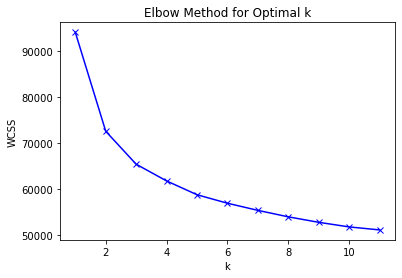

In [35]:
plt.plot(K, wcss, 'bx-')
plt.xlabel('k')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal k');

### PCA (Principal Component Analisys)

In [36]:
pca = PCA(n_components=0.8)
df_pca = pca.fit_transform(X_new)

In [37]:
df_pca

array([[ 4.7360401 ,  4.81002545,  1.87128514, ..., -0.33678197,
         3.18916688, -1.18368223],
       [ 8.01946116, -1.96032709, -0.69885233, ..., -0.96284074,
        -1.53774962, -0.8912389 ],
       [ 1.16521111, -6.81455774,  2.13669955, ...,  1.28027817,
         0.44038452,  0.1012202 ],
       ...,
       [-4.43552868,  2.29689248,  5.15973   , ...,  0.72459092,
        -1.14177452, -0.26780952],
       [-0.17912582,  6.59193523,  0.52305948, ..., -0.00992165,
        -0.24373301,  0.06906135],
       [-0.17898012,  2.89970006,  1.04061849, ..., -0.82651971,
        -0.32854746,  0.81422414]])

In [38]:
X_new.shape

(1743, 54)

In [39]:
df_pca.shape

(1743, 12)

In [40]:
pca.explained_variance_ratio_

array([0.33873093, 0.14560154, 0.06952909, 0.03916115, 0.03684504,
       0.03204469, 0.0286018 , 0.0262832 , 0.02441683, 0.02250778,
       0.01936564, 0.01715107])

In [41]:
exp_var = [round(i, 1) for i in pca.explained_variance_ratio_ * 100]

In [42]:
exp_var

[33.9, 14.6, 7.0, 3.9, 3.7, 3.2, 2.9, 2.6, 2.4, 2.3, 1.9, 1.7]

In [43]:
summ=0
for i in exp_var:
    summ=summ+i

In [44]:
summ

80.10000000000001

### Choix du nombre de clusters avec la méthode de la silhouette

 https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html

For n_clusters =  2  Average score:  0.2304878185545083
For n_clusters =  3  Average score:  0.15977528779482486
For n_clusters =  4  Average score:  0.14068770203003805
For n_clusters =  5  Average score:  0.12957620032813758
For n_clusters =  6  Average score:  0.10352718391294764
For n_clusters =  7  Average score:  0.10499029082041732
For n_clusters =  8  Average score:  0.0833485321166623
For n_clusters =  9  Average score:  0.08356222507287148
For n_clusters =  10  Average score:  0.08293439906677803
For n_clusters =  11  Average score:  0.0809439130746055


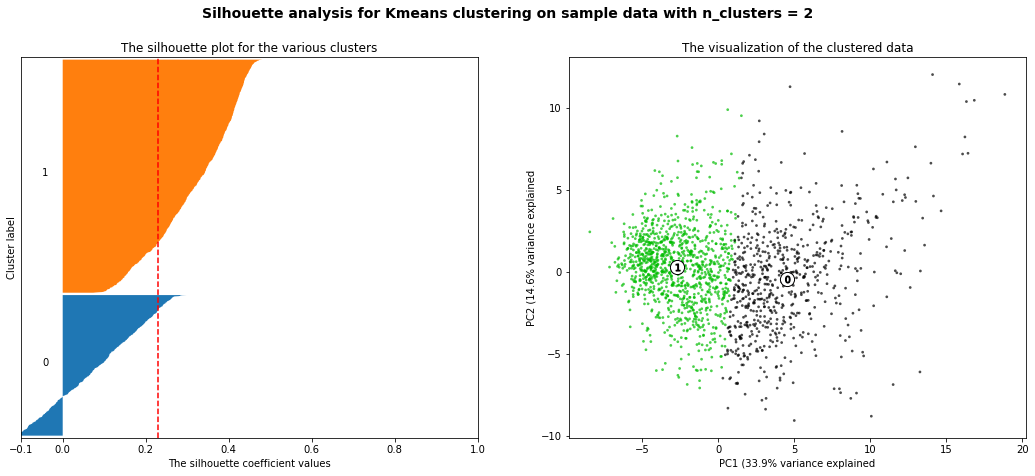

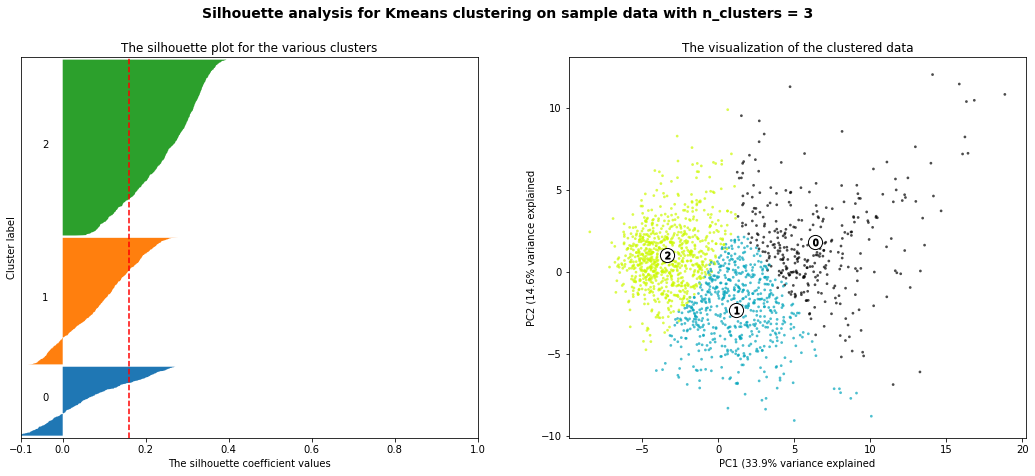

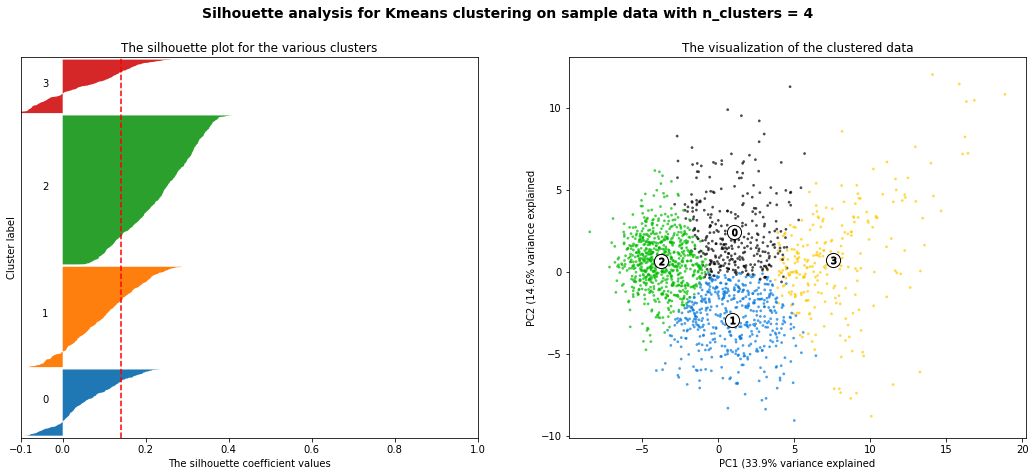

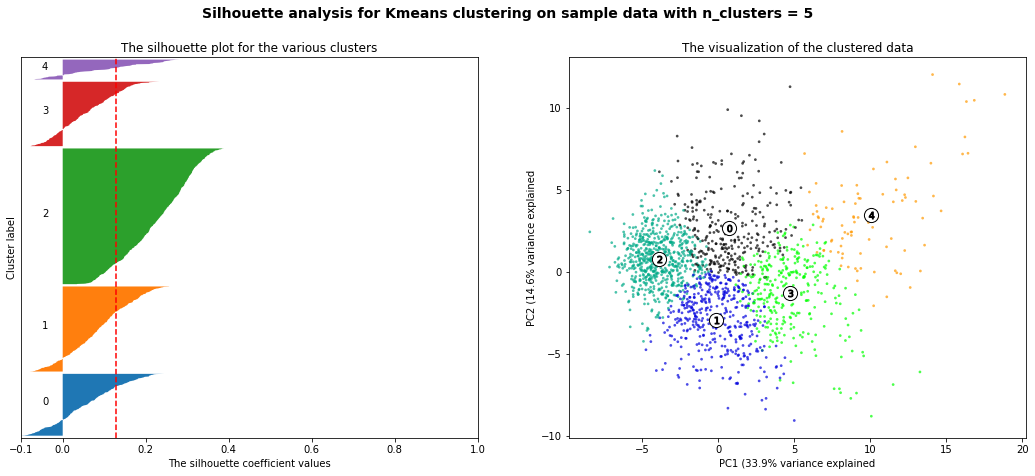

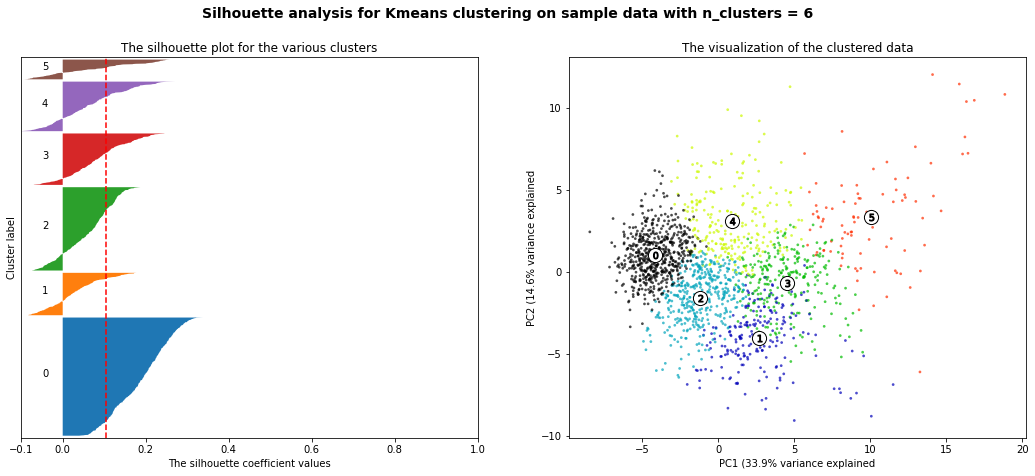

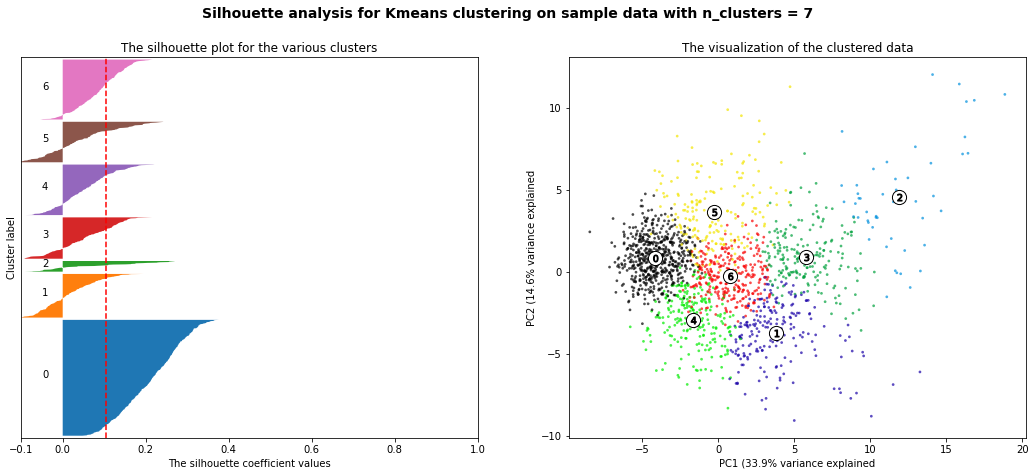

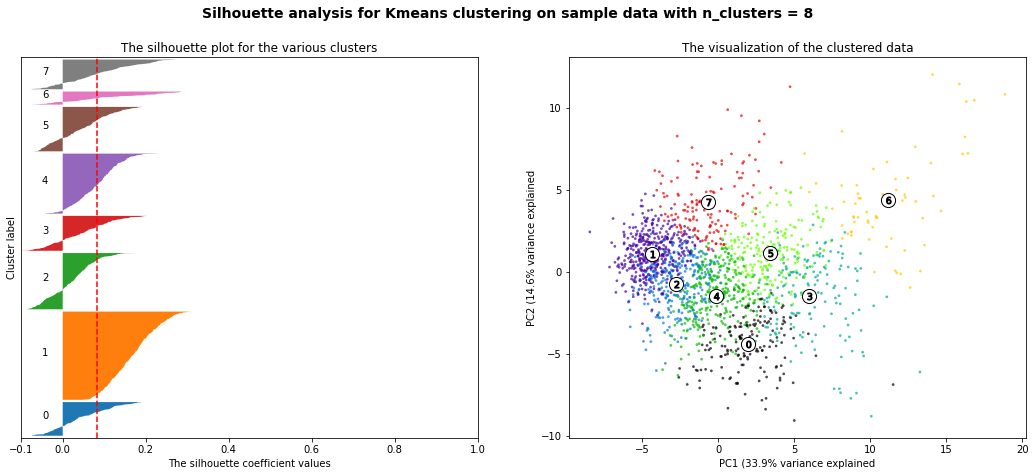

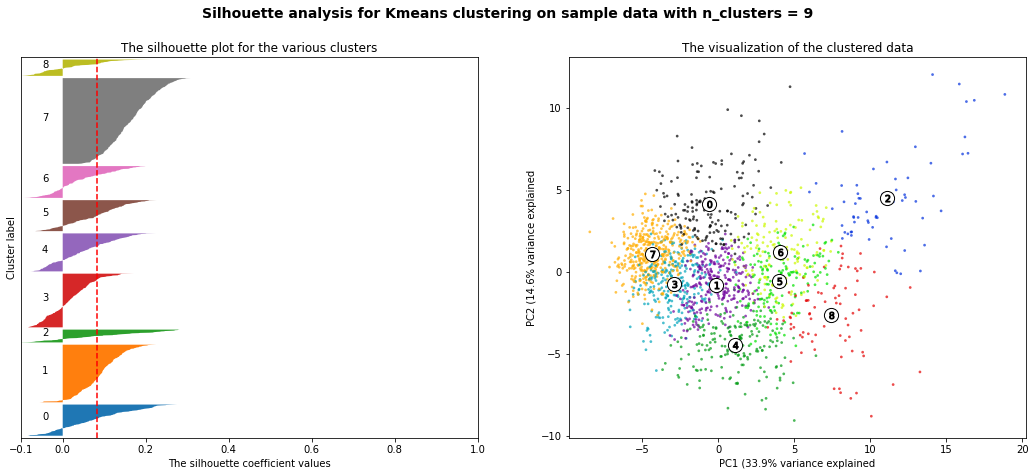

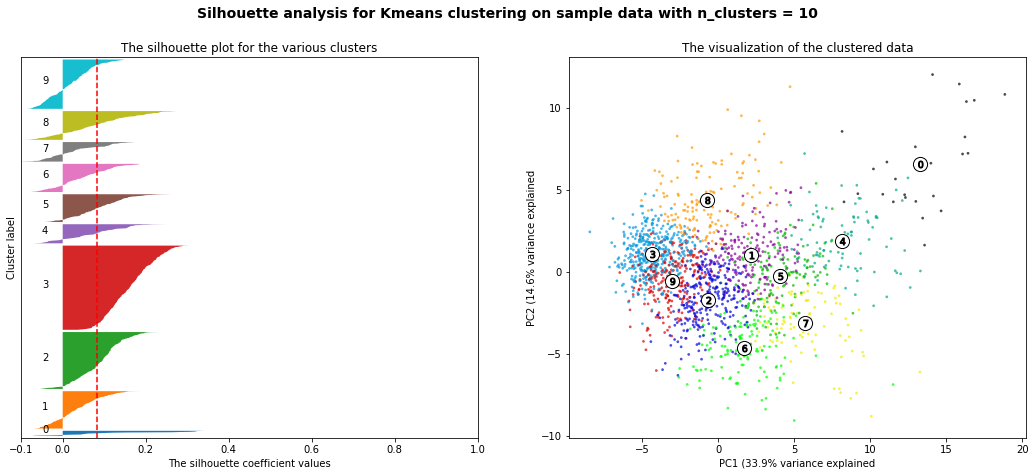

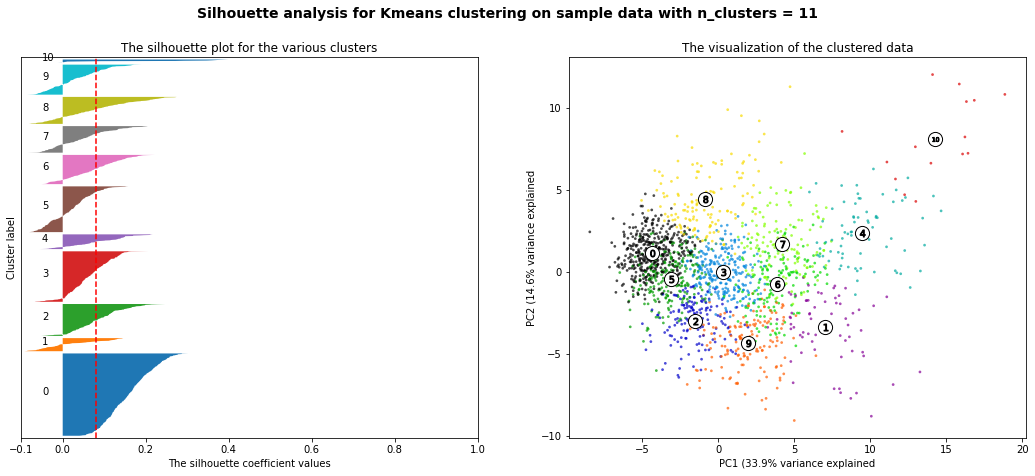

In [45]:
range_n_clusters = range(2, 12)
for n_clusters in range_n_clusters:
  fig, (ax1, ax2) = plt.subplots(1, 2)
  fig.set_size_inches(18, 7)

  ax1.set_xlim([-0.1, 1])
  ax1.set_ylim([0, len(X_new) + (n_clusters + 1) * 10])

  clusterer = KMeans(n_clusters=n_clusters, random_state=10)
  cluster_labels = clusterer.fit_predict(X_new)
  #print(cluster_labels)
  #print(np.unique(cluster_labels))

  silhouette_avg = silhouette_score(X_new, cluster_labels)
  print("For n_clusters = ", n_clusters, " Average score: ", silhouette_avg)

  sample_silhouette_values = silhouette_samples(X_new, cluster_labels)
  #print(sample_silhouette_values)
  #print(len(sample_silhouette_values))

  y_lower = 10
  for i in range(n_clusters):
    ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
    ith_cluster_silhouette_values.sort()
    #print(ith_cluster_silhouette_values.shape)

    size_cluster_i = ith_cluster_silhouette_values.shape[0]

    y_upper = y_lower + size_cluster_i
    #print(y_upper)

    ax1.fill_betweenx(np.arange(y_lower, y_upper), ith_cluster_silhouette_values)

    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    y_lower = y_upper + 10

  ax1.set_title("The silhouette plot for the various clusters")
  ax1.set_xlabel("The silhouette coefficient values")
  ax1.set_ylabel("Cluster label")   

  ax1.axvline(x = silhouette_avg, color = "red", linestyle = "--")

  ax1.set_yticks([])
  ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

  colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
  ax2.scatter(df_pca[:, 0], df_pca[:, 1], marker='.', s=30, lw=0, alpha=0.7, c=colors, edgecolor='k')

  centers = clusterer.cluster_centers_
  centers = pca.transform(centers)
  ax2.scatter(centers[:, 0], centers[:,1], marker='o', c='white', alpha=1, s=200, edgecolor='k')

  for i, c in enumerate(centers):
    ax2.scatter(c[0], c[1], marker='$%d$' % i, s=50, edgecolor='k')

  ax2.set_title("The visualization of the clustered data")
  ax2.set_xlabel('PC1 (' + str(exp_var[0]) + '% variance explained')
  ax2.set_ylabel('PC2 (' + str(exp_var[1]) + '% variance explained')

  plt.suptitle(("Silhouette analysis for Kmeans clustering on sample data with n_clusters = %d" % n_clusters),
               fontsize=14, fontweight='bold')

### Application k-means

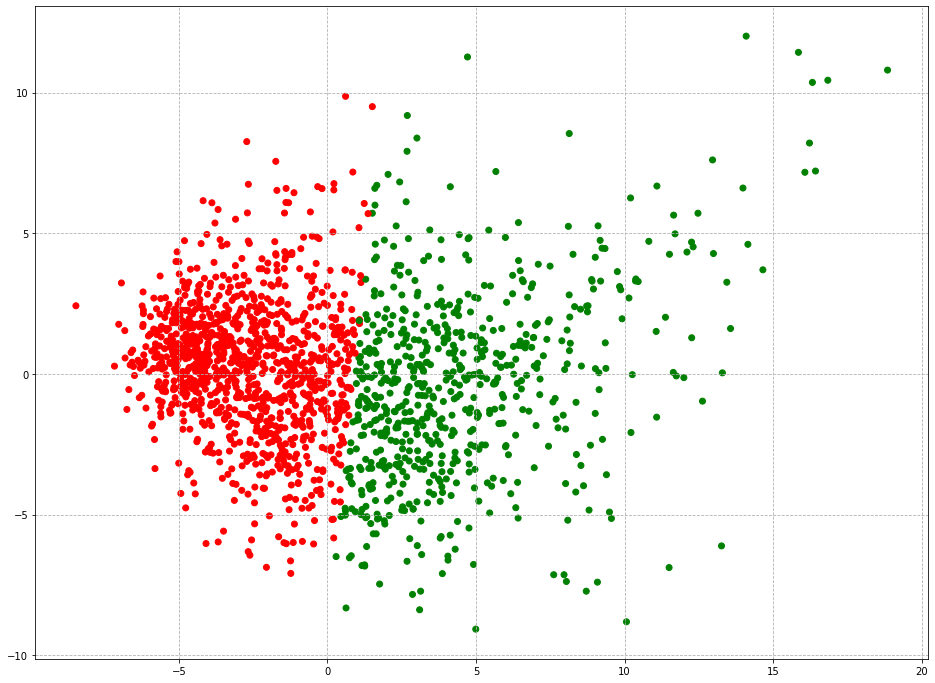

In [46]:
import matplotlib
kmeans = KMeans(n_clusters=2, random_state=0).fit(X_new)
clustering=kmeans.labels_
colors = ['red','yellow','blue','pink','green']
plt.figure(figsize=(16,12))
plt.grid(True,which="both", linestyle='--')
plt.scatter(df_pca[:, 0], df_pca[:, 1], c= clustering, cmap=matplotlib.colors.ListedColormap(colors))
#for label, x, y in zip(labels, X_pca[:, 0], X_pca[:, 1]):
    #plt.annotate(label, xy=(x, y), xytext=(-0.2, 0.2), textcoords='offset points')
plt.show()

In [66]:
km = KMeans(n_clusters=2, n_init=100, random_state=0)
km.fit(X_new)

KMeans(n_clusters=2, n_init=100, random_state=0)

In [67]:
print(km.cluster_centers_)

[[-0.05195849 -0.06248264  0.02203933 -0.20439042  0.49578141 -0.34282789
   0.69826064 -0.08366262 -0.12231491  0.3973069   0.96784196  1.0003983
   0.99555401  1.00088424  0.85399511  0.83859034  0.96759053  0.97714929
   0.88928544  0.90350037  0.84056938  0.77891716  0.85739966  0.65565398
   0.91254143  0.83019519  0.76314793  0.70294841  0.42488265  0.10713587
   0.09864759  0.4915644   0.50185275  0.50272212  0.20472639  0.00541786
   0.01139804  0.48010139  0.46168593  0.50894492  0.36985908  0.14549765
   0.56215077  0.50600864  0.16843792  0.55902462  0.02759942 -0.45242813
   0.99343606 -0.06900477 -0.10502059  0.97297508  0.52409891 -0.36431864]
 [ 0.03158731  0.0379853  -0.01339845  0.1242558  -0.30140217  0.20841658
  -0.42449609  0.05086132  0.07435934 -0.24153621 -0.58838363 -0.60817572
  -0.60523071 -0.60847114 -0.5191723  -0.50980723 -0.58823077 -0.59404187
  -0.54062648 -0.54926821 -0.51101035 -0.47352989 -0.52124204 -0.39859407
  -0.55476458 -0.50470353 -0.46394325 

In [68]:
print(km.labels_)

[0 0 0 1 0 1 0 1 0 1 1 0 1 1 0 0 0 0 1 1 1 1 0 0 0 0 1 1 0 1 0 1 0 1 0 1 1
 0 1 0 0 0 1 1 0 1 0 0 1 1 1 1 1 1 1 0 1 0 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1
 1 1 1 1 1 0 0 0 1 1 1 0 1 1 0 1 0 1 1 1 1 0 0 1 1 0 0 0 1 0 1 1 1 1 0 0 1
 0 1 1 0 0 0 0 1 1 1 0 1 0 0 1 1 1 0 0 0 0 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 0
 1 1 1 1 0 0 1 1 1 1 0 1 1 0 1 0 0 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 1
 1 1 1 0 0 1 0 0 1 0 1 1 0 1 1 1 1 0 1 0 0 1 1 1 0 1 0 0 1 1 1 1 1 1 0 0 1
 1 1 0 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 0 0 0 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1 0 1 0 1 0 0 0 1 1 1 1 1 1 0 0 1
 0 0 1 1 1 0 0 1 1 1 0 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 0 0 0 1 1 1 1 0 0 1 1
 1 1 1 0 1 1 0 0 1 1 0 1 0 1 0 0 1 0 1 0 1 1 0 1 1 0 0 1 1 0 1 0 1 0 1 1 0
 1 0 1 0 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 1 1 1 0 1 1 1 1 1 1 1 0 0 1 1 0
 1 0 1 1 0 1 0 1 1 0 1 1 1 1 0 0 0 0 1 1 1 1 1 0 0 0 0 1 0 1 0 0 0 1 0 1 0
 1 0 1 1 1 1 0 1 1 0 1 0 1 1 0 1 0 0 1 1 1 1 0 1 1 1 1 0 0 0 0 0 0 1 1 1 1
 0 1 1 0 1 1 1 0 1 0 0 0 

In [69]:
len(km.labels_)

1743

In [70]:
km.labels_

array([0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1,

In [71]:
name=['Age','CrdY', 'CrdR', 'Gls/90', 'Ast/90', 'xG/90', 'xA/90', 'Sh/90', 'SoT/90',
       'FK', 'Cmp', 'Att', 'TotDist', 'PrgDist', 'Cmp_short', 'Att_short',
       'Cmp_medium', 'Att_medium', 'Cmp_long', 'Att_long', 'KP', '1/3', 'PPA',
       'CrsPA', 'Prog', 'SCA90', 'PassLive', 'PassDead', 'Drib', 'Fld', 'Def',
       'GCA90', 'PassLive_AMB', 'PassDead_AMB', 'Drib_AMB', 'Fld_AMB',
       'Def_AMB', 'Tkl', 'TklW', 'Def 3rd', 'Mid 3rd', 'Att 3rd',
       'Tkl_dribble', 'Past', 'Succ', 'Def 3rd_pression', 'Mid 3rd_pression',
       'Att 3rd_pression', 'Touches', 'Def Pen', 'Att Pen', 'Carries', 'CPA',
       'Fls','Group']

In [72]:
name

['Age',
 'CrdY',
 'CrdR',
 'Gls/90',
 'Ast/90',
 'xG/90',
 'xA/90',
 'Sh/90',
 'SoT/90',
 'FK',
 'Cmp',
 'Att',
 'TotDist',
 'PrgDist',
 'Cmp_short',
 'Att_short',
 'Cmp_medium',
 'Att_medium',
 'Cmp_long',
 'Att_long',
 'KP',
 '1/3',
 'PPA',
 'CrsPA',
 'Prog',
 'SCA90',
 'PassLive',
 'PassDead',
 'Drib',
 'Fld',
 'Def',
 'GCA90',
 'PassLive_AMB',
 'PassDead_AMB',
 'Drib_AMB',
 'Fld_AMB',
 'Def_AMB',
 'Tkl',
 'TklW',
 'Def 3rd',
 'Mid 3rd',
 'Att 3rd',
 'Tkl_dribble',
 'Past',
 'Succ',
 'Def 3rd_pression',
 'Mid 3rd_pression',
 'Att 3rd_pression',
 'Touches',
 'Def Pen',
 'Att Pen',
 'Carries',
 'CPA',
 'Fls',
 'Group']

In [73]:
data_final = pd.DataFrame(np.concatenate((X_new,km.labels_.reshape((-1,1))),axis=1),columns=name)

In [74]:
X_cat=X_cat.reset_index(drop=True)
data_final['Player']=X_cat
data_final

Age      CrdY      CrdR    Gls/90    Ast/90     xG/90     xA/90  \
0    -1.623118 -0.022878 -0.293211  2.220741  2.726183  0.323767  4.868971   
1     0.096398  1.767808 -0.293211 -0.202410  2.056288 -0.994330  0.354034   
2     0.342043 -1.248085 -0.293211 -0.062613  0.046601 -1.114157 -1.354320   
3    -1.377473 -0.501292 -0.293211 -0.528604  0.381548  0.743161  0.598085   
4     0.342043 -1.248085 -0.293211 -0.202410  0.967707  0.922902  2.550490   
...        ...       ...       ...       ...       ...       ...       ...   
1738  0.342043 -0.022878 -0.293211 -0.668401  0.130338 -0.574936  1.208212   
1739  0.096398 -0.395767 -0.293211 -0.901396 -1.209454  1.162556 -1.354320   
1740 -1.131828  0.544217 -0.293211  1.242160  0.214075  1.701777  0.109984   
1741  3.044139 -0.303347  1.930842  2.779929 -0.204610  4.038404 -0.622168   
1742  0.342043 -0.197908  1.354971  0.869368  2.140025  1.102642  0.964161   

         Sh/90    SoT/90        FK  ...  Mid 3rd_pression  Att 3rd_pression  \
0    -0.332728  0.181615  0.536677  ...         -0.214131         -1.253491   
1    -0.773179 -0.916913  0.353770  ...          0.299316         -1.557473   
2    -1.023165  0.028332 -0.482372  ...          2.674146          0.521937   
3     1.524312  0.922483  1.381031  ...          0.775740         -0.366361   
4     0.333902  0.207162 -0.482372  ...         -0.520925         -0.512229   
...        ...       ...       ...  ...               ...               ...   
1738  0.238669  0.590370 -0.482372  ...         -0.750501         -0.688954   
1739  1.357655 -0.278234 -0.482372  ...         -0.421424          0.391030   
1740  1.595737  1.586710 -0.482372  ...         -0.655487          1.878884   
1741  2.690914  3.017351  2.267831  ...         -1.834011         -1.260293   
1742  0.107724  0.411540 -0.482372  ...         -0.656849          0.278824   

       Touches   Def Pen   Att Pen   Carries       CPA       Fls  Group  \
0     0.448345  0.168978  0.025254  0.999661  0.449969  0.734785    0.0   
1     2.045377  0.866140 -0.755209  1.127889 -0.370848  1.694028    0.0   
2     0.066134  1.204500 -1.574928 -0.234096 -0.482017  1.152100    0.0   
3    -0.619384 -0.379024 -0.230528 -0.132238  2.093056  0.136649    1.0   
4     0.701093 -0.320375  0.971524  1.006370  1.935398 -0.193823    0.0   
...        ...       ...       ...       ...       ...       ...    ...   
1738  0.406261 -0.463332  1.417845  0.599591  1.866423 -0.398866    0.0   
1739 -0.142050  2.450791  2.300107 -0.621741 -0.744780  0.468623    1.0   
1740 -1.481263 -0.571728  1.042698 -1.295762  0.953417  0.938195    1.0   
1741  0.176574  2.172562  2.716957 -0.478395 -0.550082  0.934198    1.0   
1742 -0.345238  0.439968  1.247323 -0.490396 -0.076143  0.443275    1.0   

                       Player  
0         Ademola Lookman2018  
1           Admir Mehmedi2018  
2       Alexander Esswein2018  
3        Anastasios Donis2018  
4       Andriy Yarmolenko2018  
...                       ...  
1738  Stephan El Shaarawy2021  
1739         Vedat Muriqi2021  
1740       Victor Osimhen2021  
1741   Zlatan Ibrahimović2021  
1742        Álvaro Morata2021  

[1743 rows x 56 columns]

In [77]:
data_final[['Player','Group']][:50]

Player  Group
0         Ademola Lookman2018    0.0
1           Admir Mehmedi2018    0.0
2       Alexander Esswein2018    0.0
3        Anastasios Donis2018    1.0
4       Andriy Yarmolenko2018    0.0
5              André Hahn2018    1.0
6          André Schürrle2018    0.0
7              Ante Rebić2018    1.0
8            Arjen Robben2018    0.0
9              Bobby Wood2018    1.0
10           Breel Embolo2018    1.0
11                  Bruma2018    0.0
12                 Caiuby2018    1.0
13          Chadrac Akolo2018    1.0
14      Christian Clemens2018    0.0
15      Christian Pulisic2018    0.0
16        Claudio Pizarro2018    0.0
17       Daniel Caligiuri2018    0.0
18         Daniel Ginczek2018    1.0
19            Davie Selke2018    1.0
20           Divock Origi2018    1.0
21         Emil Berggreen2018    1.0
22          Emil Forsberg2018    0.0
23            Felix Klaus2018    0.0
24            Fin Bartels2018    0.0
25          Florian Kainz2018    0.0
26           Florian Kath2018    1.0
27  Florian Niederlechner2018    1.0
28          Franck Ribéry2018    0.0
29        Franco Di Santo2018    1.0
30        Gerrit Holtmann2018    0.0
31      Guido Burgstaller2018    1.0
32            Ihlas Bebou2018    0.0
33         Ishak Belfodil2018    1.0
34           Jadon Sancho2018    0.0
35    Jean-Kévin Augustin2018    1.0
36           Jhon Córdoba2018    1.0
37          Jonas Hofmann2018    0.0
38               Jonathas2018    1.0
39          Josip Brekalo2018    0.0
40          Josip Brekalo2018    0.0
41        Karim Bellarabi2018    0.0
42          Kenan Karaman2018    1.0
43          Kevin Volland2018    1.0
44         Kingsley Coman2018    0.0
45          Landry Dimata2018    1.0
46            Lars Stindl2018    0.0
47            Leon Bailey2018    0.0
48       Luca Waldschmidt2018    1.0
49           Lucas Alario2018    1.0

## Comparaison de plusieurs Classifieurs 

In [ ]:
## Comparaison de plusieurs Classifieurs 

from sklearn.model_selection import KFold,cross_val_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier,AdaBoostClassifier,ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
import xgboost as xgb

from sklearn.model_selection import KFold,cross_val_score
import time

clfs = {
    'RF': RandomForestClassifier(n_estimators=100, random_state=1), 
    'ADA': AdaBoostClassifier(n_estimators=100,random_state=1),
    'ET': ExtraTreesClassifier(n_estimators=100,random_state=1),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'CART': DecisionTreeClassifier(criterion='gini',random_state=1),
    'ID3': DecisionTreeClassifier(criterion='entropy',random_state=1),
    'Stumb': DecisionTreeClassifier(criterion='gini',max_depth=1,random_state=1),
    'MLP': MLPClassifier(hidden_layer_sizes=(20,10),random_state=1),
    'XGB': xgb.XGBClassifier(n_estimators=100,random_state=1,colsample_bytree=0.95,max_depth=4,verbosity=0)
}

def run_classifieurs(X,Y,clfs):
    kf = KFold(n_splits=10, shuffle=True, random_state=1) 
    for i in clfs:
        clf = clfs[i]
        debut=time.time()
        cv_acc = cross_val_score(clf, X, Y, cv=kf,scoring='accuracy')
        fin=time.time()
        print("Accuracy for {0} is: {1:.3f} +/- {2:.3f} en {3:.3f}s".format(i,
                                                                            np.mean(cv_acc),
                                                                            np.std(cv_acc),fin-debut))

In [ ]:
X_for_predict = data_final.iloc[:, 0:54].values
Y_for_predict = data_final.iloc[:, 54].values

### Run classifieurs

In [ ]:
run_classifieurs(X_for_predict,Y_for_predict,clfs)

### Création de pipeline

In [ ]:
from sklearn.pipeline import Pipeline
import pickle

In [ ]:
P=Pipeline([('SS',StandardScaler()),
            ('classifieur',MLPClassifier(hidden_layer_sizes=(20,10),random_state=1))])
P.fit(X_for_predict,Y_for_predict)

pickle.dump(P,open('Foot_clfs_players_MLP.pkl','wb'))